<h1 align="center"> Complexity of Quicksort</h1>

**Question**: Is the following code an implementation of [Lomuto](https://en.wikipedia.org/wiki/Quicksort#Lomuto_partition_scheme) or [Hoare](https://en.wikipedia.org/wiki/Quicksort#Hoare_partition_scheme) approach to quick-sort? Why?

```python
array = [97, 200, 100, 101, 211, 107]
quicksort(array)
```

```python
def partition(array, begin, end):
    pivot = begin
    for i in range(begin+1, end+1):
        if array[i] <= array[begin]:
            pivot += 1
            array[i], array[pivot] = array[pivot], array[i]
    array[pivot], array[begin] = array[begin], array[pivot]
    return pivot

def quicksort(array, begin=0, end=None):
    if end is None:
        end = len(array) - 1
    if begin >= end:
        return
    pivot = partition(array, begin, end)
    quicksort(array, begin, pivot-1)
    quicksort(array, pivot+1, end)
```

For a visual representation of the code above please consult the image below. Green has been chosen to represent the value of ``` array[begin] ``` and blue for ``` array[pivot] ```. Note that that this figure is intended to show the evolution of the script so starting at the first row and moving downwards will imply that you are moving forward in time/iterations.

![Visual Representation of the Quicksort above](Homework4_02.jpg)

Because both pointers initialize at the same point on the left-hand side, and move in such a  manner, this code is clearly an implementation of the Lomuto version of quicksort.


## Visualizing the Time Complexity of Quicksort

The time complexity of quicksort can be estimated by defining a timing array and evaluating it's performance on an arbitrary array.

In [2]:
%matplotlib inline
import time
import numpy as np
import numpy.random as nprnd
import matplotlib.pyplot as plt

def partition(array, begin, end):
    pivot = begin
    for i in range(begin+1, end+1):
        if array[i] <= array[begin]:
            pivot += 1
            array[i], array[pivot] = array[pivot], array[i]
    array[pivot], array[begin] = array[begin], array[pivot]
    return pivot

def quicksort(array, begin=0, end=None):
    if end is None:
        end = len(array) - 1
    if begin >= end:
        return
    pivot = partition(array, begin, end)
    quicksort(array, begin, pivot-1)
    quicksort(array, pivot+1, end)
    
def build_timing_arrays(array_of_n, array_of_timings,function_to_time):
    n_i=128
    for _ in range(25):
        arr = nprnd.randint(0,1000000,n_i)
        array_of_n.append(n_i)
        
        # Timed function
        arr_copy = arr
        start = time.time()
        function_to_time(arr_copy)
        array_of_timings.append(time.time()-start)
    
        # Increase the size of the array
        n_i = int(1.25*n_i)

array_of_n = []
array_of_timings = []
build_timing_arrays(array_of_n,array_of_timings,quicksort)



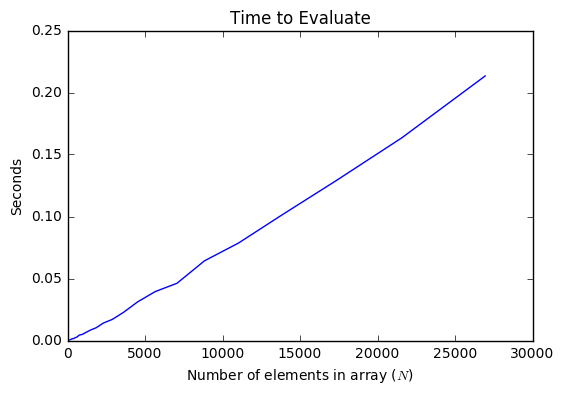

In [3]:
plt.plot(array_of_n,np.array(array_of_timings))
plt.title('Time to Evaluate')
plt.ylabel('Seconds')
plt.xlabel('Number of elements in array ($N$)')
plt.show()

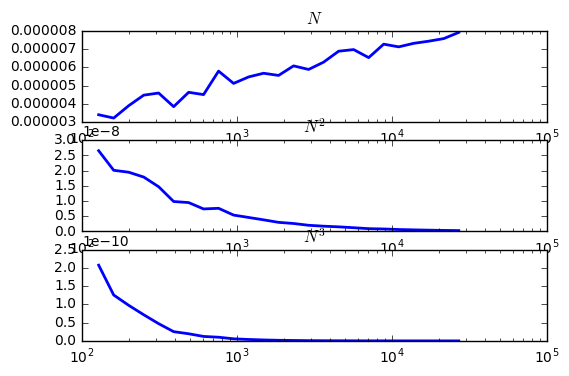

In [4]:
from pylab import *
subplot(3,1,1)
plt.plot(array_of_n,np.array(array_of_timings)/(np.array(array_of_n)),linewidth=2.0) # N
plt.xscale('log')
plt.title('$N$')
subplot(3,1,2)
plt.plot(array_of_n,np.array(array_of_timings)/((np.array(array_of_n)*1.0)**2),linewidth=2.0) # N^2
plt.xscale('log')
plt.title('$N^{2}$')
subplot(3,1,3)
plt.plot(array_of_n,np.array(array_of_timings)/((np.array(array_of_n)*1.0)**3),linewidth=2.0) # N^3
plt.xscale('log')
plt.title('$N^{3}$')
plt.show()

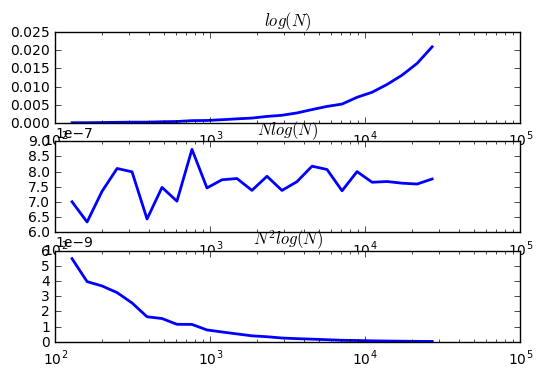

In [5]:
subplot(3,1,1)
plt.plot(array_of_n,np.array(array_of_timings)/np.log(np.array(array_of_n)),linewidth=2.0) # log(N)
plt.xscale('log')
plt.title('$log(N)$')
subplot(3,1,2)
plt.plot(array_of_n,np.array(array_of_timings)/(np.array(array_of_n)*np.log(np.array(array_of_n))),linewidth=2.0) # N log(N)
plt.xscale('log')
plt.title('$Nlog(N)$')
subplot(3,1,3)
plt.plot(array_of_n,np.array(array_of_timings)/((np.array(array_of_n)*1.0)**2*np.log(np.array(array_of_n))),linewidth=2.0) # N^2 log(N)
plt.xscale('log')
plt.title('$N^{2}log(N)$')
plt.show()

In the plots above we have scaled our _Time to Evaluate_ function by the hypothesized time complexity. Based upon the results of the plots above we can conclude that quicksort has a complexity of $Nlog(N)$. We can make this inference due to the oscillations dampening around some central tendency whereas all other scaling case the function to become unbounded.

We can get an approximate measure for how long the calculation would take given an array of size "n" and do so in the following lines:


TypeError: 'list' object cannot be interpreted as an integer

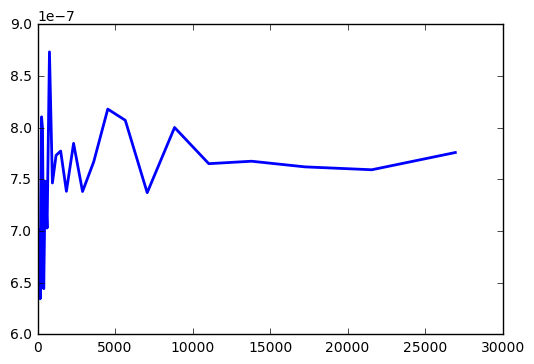

In [7]:
plt.plot(array_of_n,np.array(array_of_timings)/(np.array(array_of_n)*np.log(np.array(array_of_n))),linewidth=2.0) # N log(N)
for i in range(array_of_timings):
    # Scatter plot with point_size^2 = 75, and with respective colors
    plt.scatter(x, y[i], marker=markers[i], s=75, c=colours[i])
    # Connects points with lines, and with respective colours
    plt.plot(x, y[i], c=colours[i])
plt.xscale('log')
plt.title('$Nlog(N)$')
plt.show()

The min/max multiplier of this functions time complexity (for my machine) is equal to 7.5E-7 and 8.5E-7. So if we want to calculate an approximate runtime with the following formula: $$8.5*10^{-7}*nlog(n)$$